In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset_train = pd.read_csv('EURUSD_M1TechnicalIndicators.txt', usecols=['open', 'close'])
dataset_test  = pd.read_csv('Test_EURUSD_M1TechnicalIndicators.csv', usecols=['open', 'close'])

gt_train = (dataset_train.open - dataset_train.close) > 0
gt_test = (dataset_test.open - dataset_test.close) > 0
eq_train = (dataset_train.open - dataset_train.close) == 0
eq_test = (dataset_test.open - dataset_test.close) == 0

y_train = np.ones(len(gt_train))
y_test = np.ones(len(gt_test))

colors_train = np.array(gt_train, str)
colors_test = np.array(gt_test, str)
colors_train[gt_train] = 'g'
colors_train[~gt_train] = 'r'
colors_train[eq_train] = 'k'
colors_test[gt_test] = 'g'
colors_test[~gt_test] = 'r'
colors_test[eq_test] = 'k'

rx = .2
ry = 2
rect = [(-rx, -ry), (rx, -ry), (rx, ry), (-rx, ry)]

plt.figure()
plt.scatter(np.arange(y_train.size), y_train, facecolor=colors_train, verts=rect, s=1000)
plt.scatter(np.arange(y_test.size), y_test+3, facecolor=colors_test, verts=rect, s=1000)
plt.ylim(0, 5)
plt.yticks([1, 4], ['Train', 'Test'])

FileNotFoundError: [Errno 2] No such file or directory: 'EURUSD_M1TechnicalIndicators.txt'

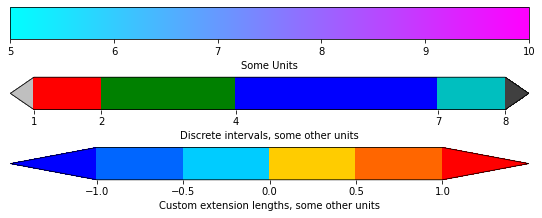

In [1]:
'''
====================
Customized colorbars
====================

This example shows how to build colorbars without an attached mappable.
'''

import matplotlib.pyplot as plt
import matplotlib as mpl

# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [1, 2, 4, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                # to use 'extend', you must
                                # specify two extra boundaries:
                                boundaries=[0] + bounds + [13],
                                extend='both',
                                ticks=bounds,  # optional
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Discrete intervals, some other units')

# The third example illustrates the use of custom length colorbar
# extensions, used on a colorbar with discrete intervals.
cmap = mpl.colors.ListedColormap([[0., .4, 1.], [0., .8, 1.],
                                  [1., .8, 0.], [1., .4, 0.]])
cmap.set_over((1., 0., 0.))
cmap.set_under((0., 0., 1.))

bounds = [-1., -.5, 0., .5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap,
                                norm=norm,
                                boundaries=[-10] + bounds + [10],
                                extend='both',
                                # Make the length of each extension
                                # the same as the length of the
                                # interior colors:
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb3.set_label('Custom extension lengths, some other units')

plt.show()

101 101


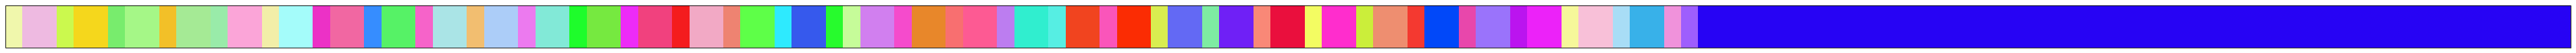

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True, randRGBcolors = [], bounds = [], subplot_ = 1, figsize = 40, ax_ = None, label = ''):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np

    if randRGBcolors:
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)
        # return random_colormap, randRGBcolors


    # if type not in ('bright', 'soft'):
    #     print ('Please choose "bright" or "soft" for type')
    #     return

    # if verbose:
    #     print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in range(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        if ax_ is None:
            fig, ax_ = plt.subplots(1, 1, figsize=(figsize, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1) if bounds == [] else bounds
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax_, cmap=random_colormap, norm=norm, spacing='proportional', ticks=[],
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')
        if label != '':
            cb.ax.tick_params(labelsize='large')
            cb.set_label(label,size=70)
        # else:
        #     cb.ax.tick_params(labelsize='large')
        #     cb.set_label('LABEL',size=50)
        

    return random_colormap, randRGBcolors


fig, ax = plt.subplots(figsize=(60, 2))
fig.subplots_adjust(bottom=0.5)

# cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan', 'red', 'cyan'])
cmap, randRGBcolors= rand_cmap(101, type='bright', first_color_black=False, last_color_black=False, verbose=False)
# print(cmap.segmentdata)
# cmap.set_over('0.25')
# cmap.set_under('0.75')
# print (randRGBcolors)
print (len(randRGBcolors), len(set(randRGBcolors)))
bounds = [i for i in range(0,100)] + [150]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                # norm=norm,
                                boundaries= bounds, #[0] + bounds + [13],
                                # extend='both',
                                ticks=[],
                                ticklocation = 'bottom',
                                spacing='proportional',
                                orientation='horizontal',
                                )
# cmap, randRGBcolors= rand_cmap(100, type='0', first_color_black=False, last_color_black=False, verbose=True, randRGBcolors = randRGBcolors)

# cb2.set_label('Discrete intervals, some other units')
fig.show()

len of elems: 143


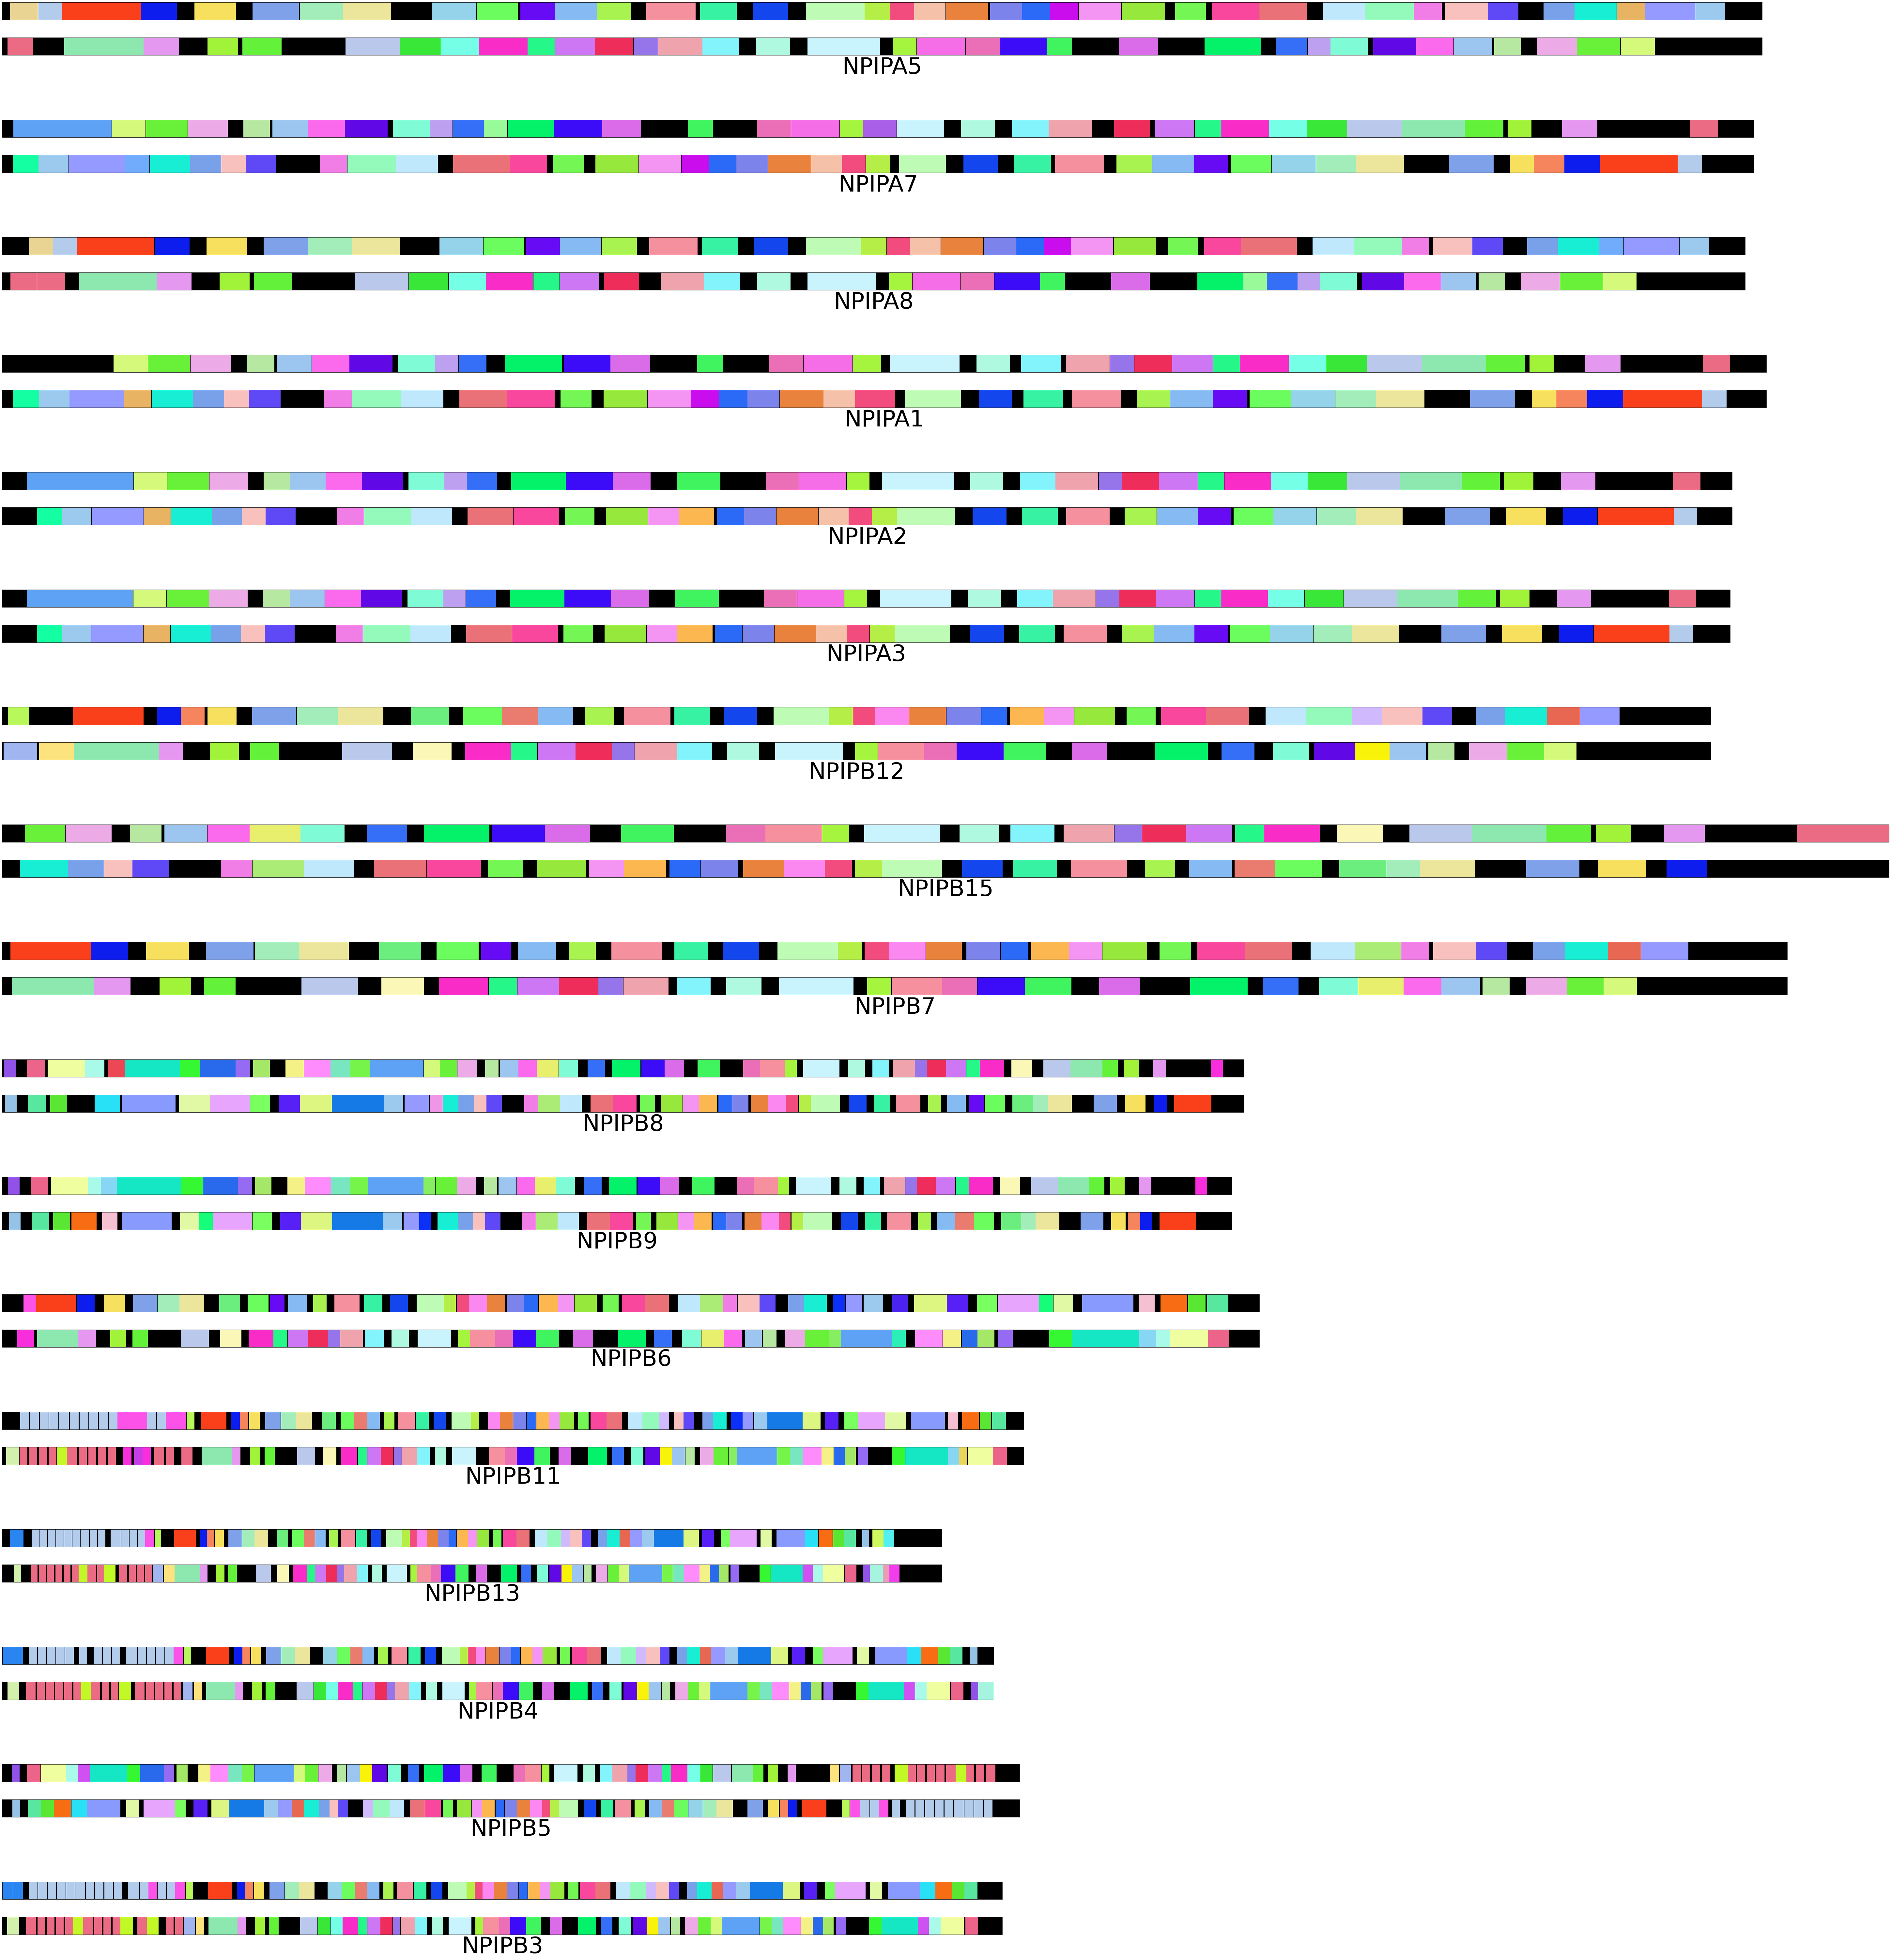

In [8]:
set_all_elems = set()
import random
def process(elem, sign):
    # print (elem)
    if len( elem.split('(') ) > 1:

        elem_ret = elem.split('(')[1]
        begin, len2, id, strand = elem_ret.split(',')
        # if strand.strip() == '+':
        if strand.strip() == sign:
            return int(begin), int(len2), id
all_regions = []
figsize = 40
fig = plt.figure(figsize=(40, 5))

# ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
# ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])
# ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])
axes = [[0.05, 1, 0.9, 0.15]]
axses_real = []
biggest = 0
npip_dict = dict()
for i in open('/home/hiseric1/new_sedef/biser/src/results/output_hg19_100.txt'):
    line = i.split('\t')
    len_ = int(line[2]) - int(line[1])
    if len_ > biggest:
        biggest = len_
for i in open('/home/hiseric1/new_sedef/biser/src/results/output_hg19_100.txt'):
    line = i.split('\t')
    s1 = line[4][1:-2]
    len_ = int(line[2]) - int(line[1])
    elems = s1.split(')')
    elems_real = []
    set_help = set()

    # for new positive one
    # new_axe = axes[-1]
    # new_axe[1] = new_axe[1]  - 0.7
    # new_axe[2] = biggest / len_  # random.uniform(0, 1)
    # ax1 = fig.add_axes(new_axe)
    # axes.append(new_axe)
    # axses_real.append(ax1)

    # # for new negative one
    # new_axe = axes[-1]
    # new_axe[1] = new_axe[1]  - 0.3
    # new_axe[2] = biggest / len_  # random.uniform(0, 1)
    # ax2 = fig.add_axes(new_axe)
    # axes.append(new_axe)
    # axses_real.append(ax2)

    for j in elems:
        rez = process(j, '+')
        if not rez or len(rez) == 0:
            continue
        if rez:
            b,l,id = rez
            elems_real.append((b,l,id))
            set_help.add(id)
    all_regions.append((line[0], int(line[1]), int(line[2]) , line[3] , elems_real ))
    npip_dict[line[3]] = [(line[0], int(line[1]), int(line[2]) , line[3] , elems_real )]

    elems_real = []

    for j in elems:
        rez = process(j, '_')
        if not rez or len(rez) == 0:
            continue
        if rez:
            b,l,id = rez
            elems_real.append((b,l,id))
            set_help.add(id)
    all_regions.append((line[0], int(line[1]), int(line[2]) , line[3] , elems_real ))
    npip_dict[line[3]].append((line[0], int(line[1]), int(line[2]) , line[3] , elems_real ))

    # print (elems_real)
    # print (len(elems_real), len(set(set_help)))
    set_all_elems = set_all_elems.union(set_help)
print (f'len of elems: {len(set_all_elems)}')
dict_colors = dict()
cmap, randRGBcolors = rand_cmap(len(set_all_elems), type='bright', first_color_black=False, last_color_black=False, verbose=False)
dict_colors['0'] = (0,0,0)
assert len(randRGBcolors) == len(set_all_elems) 
list_all_elems = list(set_all_elems)
for i in range(len(randRGBcolors)):
    dict_colors[list_all_elems[i]] = randRGBcolors[i]
# print (dict_colors)
count = 0
npip_list = ['NPIPA5', 'NPIPA7', 'NPIPA8', 'NPIPA1', 'NPIPA2', 'NPIPA3', 'NPIPB12', 'NPIPB15', 'NPIPB7', 'NPIPB8', 'NPIPB9', 'NPIPB6', 'NPIPB11', 'NPIPB13', 'NPIPB4', 'NPIPB5', 'NPIPB3']
# for npip in all_regions:
for npip1 in npip_list:
    len_ = npip_dict[npip1][0][2] - npip_dict[npip1][0][1]
    new_axe = axes[-1]
    new_axe[1] = new_axe[1]  - 0.7
    new_axe[2] = biggest / len_  # random.uniform(0, 1)
    ax1 = fig.add_axes(new_axe)


    # for new negative one
    new_axe = axes[-1]
    new_axe[1] = new_axe[1]  - 0.3
    new_axe[2] = biggest / len_  # random.uniform(0, 1)
    ax2 = fig.add_axes(new_axe)

    for npip in npip_dict[npip1]:
        npip_elems = npip[4]
        max_gap = 0
        # ax = npip[5] # axses_real[count]
        count += 1
        list_locations = []
        list_locations.append(0)
        begin = npip[1]
        list_colors = [dict_colors['0']]
        for i in range(0, len(npip_elems) - 1):
            gap = npip_elems[i + 1][0] - (npip_elems[i][0] + npip_elems[i][1])
            list_locations.append(npip_elems[i][0] - begin)
            list_colors.append(dict_colors[npip_elems[i][2]])
            if gap > 0:
                list_locations.append(npip_elems[i][0] + npip_elems[i][1] - begin)
                list_colors.append(dict_colors['0'])
                if gap > max_gap:
                    max_gap = gap
        
        list_locations.append(npip_elems[-1][0]- begin)
        list_colors.append(dict_colors[npip_elems[-1][2]])

        list_locations.append(npip[2] - npip[1])
        list_colors.append(dict_colors['0'])
        # print (list_locations[0:20])
        # print (list_colors[0:5])
        
        # fig, ax = plt.subplots(figsize=(60, 2))
        # fig.subplots_adjust(bottom=0.5)
        # cmap, randRGBcolors= rand_cmap(len(list_locations), type='0', first_color_black=False, last_color_black=False, verbose=False, randRGBcolors = list_colors)
        # cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
        #                             # norm=norm,
        #                             boundaries= list_locations, #[0] + bounds + [13],
        #                             # extend='both',
        #                             ticks=[],
        #                             # ticklocation = 'bottom',
        #                             spacing='proportional',
        #                             orientation='horizontal',
                                    # )
        
        for i in range(0, len(list_locations) - 1):
            if list_locations[i] > list_locations[i+1]:
                print (list_locations[i] , list_locations[i+1], i, i+1 , len(list_locations))
                assert False
        label=''
        ax = ax1
        if(count % 2 == 0):
            label=npip[3]
            ax = ax2

        cmap, randRGBcolors= rand_cmap(len(list_locations), type='0', first_color_black=False, last_color_black=False, verbose=True, randRGBcolors = list_colors, bounds = list_locations, subplot_ = count, figsize = figsize, ax_ = ax, label=label)

        # cmap.set_over('0.55')
        # cmap.set_under('0.75')  
        # figsize = 60
        
        # break
        # print (list_locations)
        # print (list_colors)
        assert (len(list_locations) == len(list_colors))


    # print (max_gap)
# fig.show()
# fig.savefig('results/final_elementaries_decomposition.png', format = 'png')




0.0
['NPIPA2', 'NPIPA3', 'NPIPA5', 'NPIPA1', 'NPIPA8', 'NPIPA7', 'NPIPB3', 'NPIPB4', 'NPIPB5', 'NPIPB6', 'NPIPB7', 'NPIPB8', 'NPIPB9', 'NPIPB11', 'NPIPB12', 'NPIPB13', 'NPIPB15']
[Clade(name='NPIPA1'), Clade(name='NPIPB12'), Clade(name='NPIPB15'), Clade(name='NPIPB7'), Clade(name='NPIPB8'), Clade(name='NPIPB9'), Clade(name='NPIPB6'), Clade(name='NPIPB11'), Clade(name='NPIPB13'), Clade(name='NPIPB4'), Clade(name='NPIPB5'), Clade(name='NPIPB3'), Clade(name='NPIPA2'), Clade(name='NPIPA3'), Clade(name='NPIPA5'), Clade(name='NPIPA7'), Clade(name='NPIPA8')]


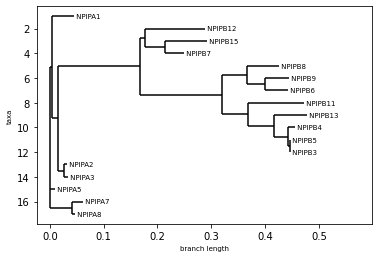

In [6]:


# from fastcluster import average
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import average, linkage

from matplotlib import pyplot as plt
import scipy
import pandas as pd 
import scipy.spatial
import scipy.cluster
import json
import matplotlib.pyplot as plt
from functools import reduce
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceMatrix
import pylab
from Bio import Phylo
# from skbio import DistanceMatrix
# from skbio.tree import nj

# X = [[0,0.4,0.5], [0.4,0,0.1],[0.5,0.1,0]]
# labels = ['1__','2__','3_-____---']

import sys
# print(sys.getrecursionlimit())
# sys.exit(1)
sys.setrecursionlimit(200000)



#Loading data

# out = open('results/output_distances_npip.txt', 'w')
# out_sds = open('results/output_npip.txt', 'w')
# file_ = open('results/output_distances.txt', 'r').readlines()
file_ = open('/home/hiseric1/new_sedef/biser/src/results/output_distances_hg19_100.txt', 'r').readlines()

matrix_len = file_[0]
b = np.ones((int(matrix_len),int(matrix_len)))
min_ = 2.0
for i in file_[1:]:
    line = i.split('\t')
    c1 = int(line[0])
    c2 = int(line[1])
    
    num = float(line[2])
    if num < min_:
        min_ = num
    b[c1][c2] = num
    b[c2][c1] = num


X = b
for i in range(0, len(X)):
    X[i][i] = 0.0
print (min_)

s = ''

# for i in X:
#     for j in i:
#         # print (i)
#         s+= f'{round(j,3)}\t\t'
#     s+= f'\n'
# print (s)

names = []
# for i in open('results/output_sds.txt', 'r'):
for i in open('/home/hiseric1/new_sedef/biser/src/results/output_hg19_100.txt', 'r'):

	line = i.split('\t')
	# if (abs(int(line[1])-int(line[2])) < 2):
	# 	continue
	# names.append(f'{line[0]}:{line[1]}-{line[2]}&{line[3]}:{line[4]}-{line[5]}')
	names.append(f'{line[3]}')

print (names)
labels = names
# sys.exit(1)

# # this part for neighbour joining

# print (X)
X_sub = []
for i in range(0,len(X)):
    X_sub_one = []
    for j in range (0,i+1):
        X_sub_one.append(X[i][j])
    X_sub.append(X_sub_one)

X = X_sub

# import numbers


dm = DistanceMatrix(names=labels, matrix=X)
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)
# print(tree)
tree.ladderize()
plt.rc('font', size=7)          # controls default text sizes #HERE IS THE SETTING FOR THAT ALLOWS ME TO HIDE THE BRANCH TIP LABELS
plt.rc('axes', titlesize=50)     # fontsize of the axes title
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('figure', titlesize=18)   # fontsize of the figure title
print (list(tree.find_clades(terminal=True)))
def label_func(node):
    # print (node)
    l = []
    for i in list(tree.find_clades(terminal=True)):
        l.append(i.name)
    if str(node) in l:
        return str(node)
    return ''
Phylo.draw(tree, do_show=False, show_confidence = False, label_func = label_func)

# Phylo.draw_graphviz(tree)
plt.savefig("TreeToCutOff.png", format='png', dpi=1200)
# pylab.show()